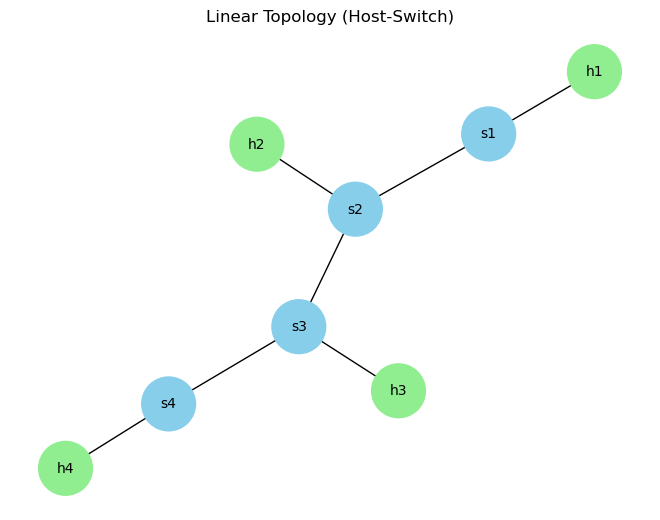

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# Add switches
switches = ['s1', 's2', 's3', 's4']
for s in switches:
    G.add_node(s, type='switch')

# Add hosts and connect them to switches
for i, s in enumerate(switches, start=1):
    host = f'h{i}'
    G.add_node(host, type='host')
    G.add_edge(host, s)

# Connect switches linearly
for i in range(len(switches) - 1):
    G.add_edge(switches[i], switches[i + 1])

# Set node colors based on type
color_map = []
for node in G.nodes(data=True):
    if node[1]['type'] == 'host':
        color_map.append('lightgreen')
    else:  # switch
        color_map.append('skyblue')

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # positions for consistent layout
nx.draw(G, pos, with_labels=True, node_color=color_map,
        node_size=1500, font_size=10)
plt.title("Linear Topology (Host-Switch)")
plt.show()

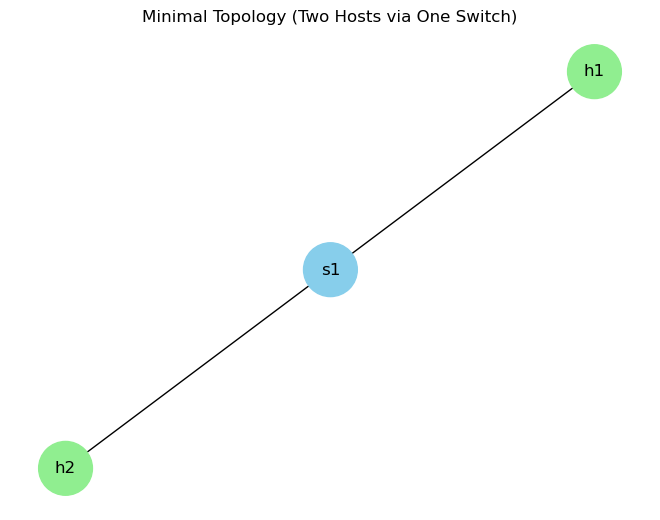

In [3]:
G_minimal = nx.Graph()

# Add switch
G_minimal.add_node('s1', type='switch')

# Add hosts and connect them to the switch
G_minimal.add_node('h1', type='host')
G_minimal.add_node('h2', type='host')
G_minimal.add_edge('h1', 's1')
G_minimal.add_edge('h2', 's1')

# Color map: green for hosts, blue for switch
color_map = []
for node in G_minimal.nodes(data=True):
    if node[1]['type'] == 'host':
        color_map.append('lightgreen')
    else:
        color_map.append('skyblue')

# Draw
pos = nx.spring_layout(G_minimal, seed=2)
nx.draw(G_minimal, pos, with_labels=True, node_color=color_map, node_size=1500)
plt.title("Minimal Topology (Two Hosts via One Switch)")
plt.show()

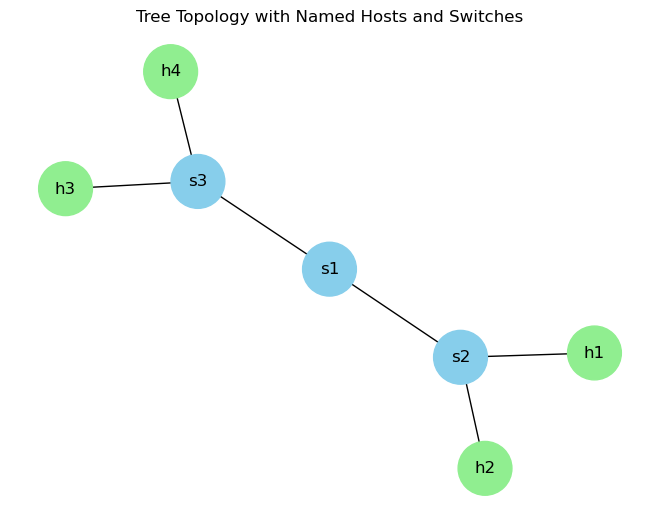

In [5]:
# Create the original tree with numeric nodes
# 2-ary tree of height 2 (7 nodes total)
original_tree = nx.balanced_tree(r=2, h=2)

# Separate leaf and internal nodes
leaf_nodes = [node for node in original_tree.nodes(
) if original_tree.degree(node) == 1]
internal_nodes = [node for node in original_tree.nodes()
                  if original_tree.degree(node) > 1]

# Create a mapping from numeric node to 'sX' or 'hX'
mapping = {}
for i, node in enumerate(internal_nodes, start=1):
    mapping[node] = f's{i}'
for i, node in enumerate(leaf_nodes, start=1):
    mapping[node] = f'h{i}'

# Relabel the graph
G_tree_named = nx.relabel_nodes(original_tree, mapping)

# Set node types
node_types = {}
for node in G_tree_named.nodes():
    if node.startswith('h'):
        node_types[node] = 'host'
    else:
        node_types[node] = 'switch'

# Set color map
color_map = []
for node in G_tree_named.nodes():
    color_map.append('lightgreen' if node_types[node] == 'host' else 'skyblue')

# Draw the graph
# Use graphviz_layout for better tree look (optional)
pos = nx.spring_layout(G_tree_named, seed=4)
nx.draw(G_tree_named, pos, with_labels=True,
        node_color=color_map, node_size=1500)
plt.title("Tree Topology with Named Hosts and Switches")
plt.show()

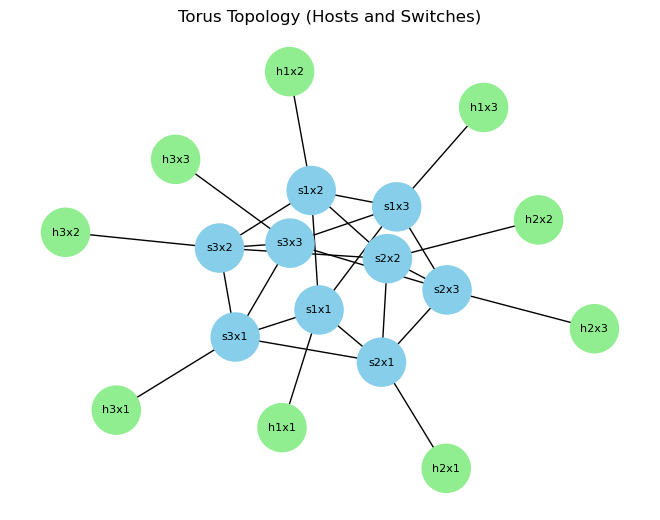

In [6]:
# Define torus dimensions
rows, cols = 3, 3  # e.g., 3x3 torus

# Create torus of switches using periodic boundary conditions (wraps around)
switch_grid = nx.grid_2d_graph(rows, cols, periodic=True)

# Initialize a new graph to hold switches and hosts
G_torus = nx.Graph()

# Add switches with new names and build a mapping
switch_mapping = {}
for i in range(rows):
    for j in range(cols):
        coord = (i, j)
        name = f's{i+1}x{j+1}'
        switch_mapping[coord] = name
        G_torus.add_node(name, type='switch')

# Add edges between switches (with wrapped coordinates)
for (u, v) in switch_grid.edges():
    G_torus.add_edge(switch_mapping[u], switch_mapping[v])

# Add hosts, one per switch
for i in range(rows):
    for j in range(cols):
        switch = f's{i+1}x{j+1}'
        host = f'h{i+1}x{j+1}'
        G_torus.add_node(host, type='host')
        G_torus.add_edge(host, switch)

# Assign colors
color_map = []
for node, data in G_torus.nodes(data=True):
    if data['type'] == 'host':
        color_map.append('lightgreen')
    else:
        color_map.append('skyblue')

# Use spring layout (or kamada_kawai_layout for better symmetry)
pos = nx.spring_layout(G_torus, seed=7)
nx.draw(G_torus, pos, with_labels=True,
        node_color=color_map, node_size=1200, font_size=8)
plt.title("Torus Topology (Hosts and Switches)")
plt.show()

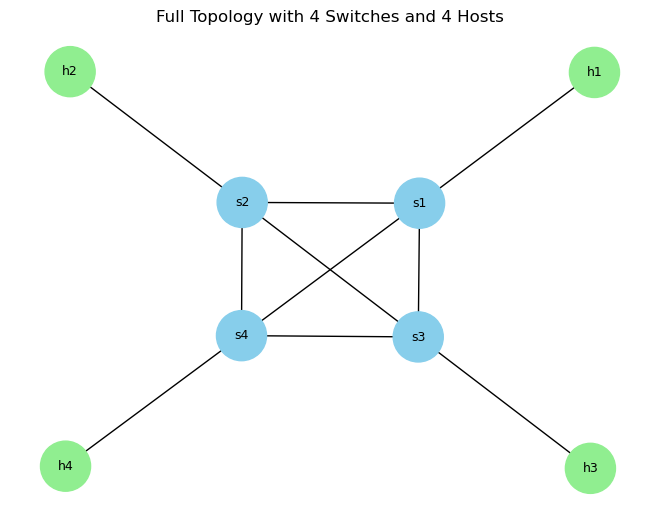

In [7]:

n = 4
G_full = nx.Graph()

# Add switches
switches = [f's{i+1}' for i in range(n)]
for s in switches:
    G_full.add_node(s, type='switch')

# Fully connect switches (clique)
for i in range(n):
    for j in range(i + 1, n):
        G_full.add_edge(switches[i], switches[j])

# Add one host per switch
for i, s in enumerate(switches, start=1):
    h = f'h{i}'
    G_full.add_node(h, type='host')
    G_full.add_edge(h, s)

# Color map
color_map = []
for node, data in G_full.nodes(data=True):
    color_map.append('lightgreen' if data['type'] == 'host' else 'skyblue')

# Draw
pos = nx.spring_layout(G_full, seed=42)  # Spring layout spreads full meshes well
nx.draw(G_full, pos, with_labels=True, node_color=color_map, node_size=1300, font_size=9)
plt.title(f"Full Topology with {n} Switches and {n} Hosts")
plt.show()
